# Tasa de retorno de un activo

$P_t = \frac{P_f- P_i}{P_i}$

p = precio

$p_t = log (P_t)$

## Movimiento Browniano

$p_t = p_{t-1} + \mu + e_t$

$\mu$ drift (deriva o pasos)

$e_t$ ruido gaussiano

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm

In [35]:
T = 1000
P0 = 10 #valor inicial
mu = 0.001 #drift

In [36]:
# p_{t-1}
last_p = np.log(P0)

# arreglo para almacenar
log_returns = np.zeros(T)
prices = np.zeros(T)

for t in range(T):
  # taza de retorno
  r = 0.01 * np.random.randn()
  # p_t
  p = last_p + mu + r
  # almacenar resultados
  log_returns[t] = r + mu
  prices[t] = np.exp(p)
  # siguente paso
  last_p = p

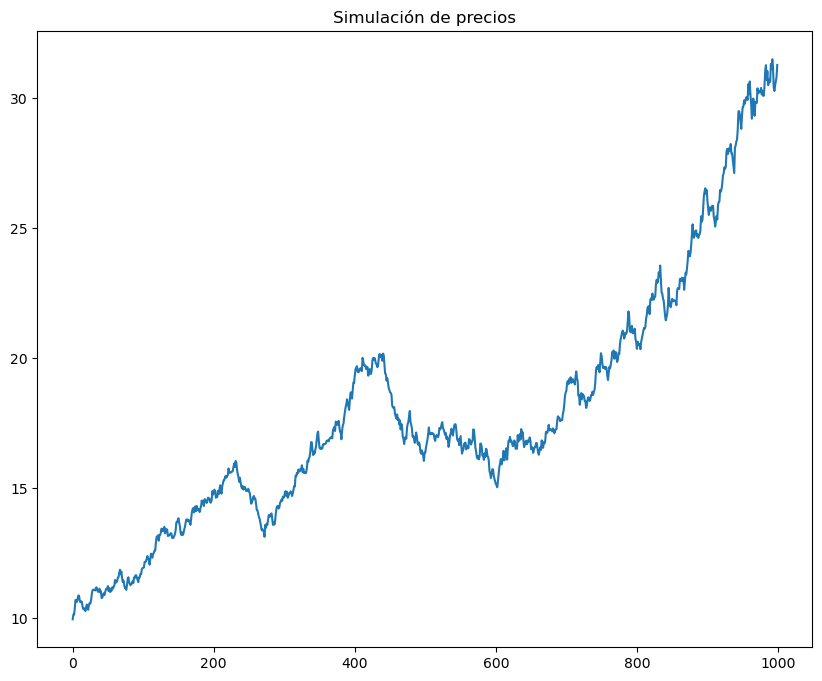

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(prices)
plt.title("Simulación de precios");

# Métricas

https://finance.yahoo.com/quote/SPY/history

In [38]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [39]:
df = pd.read_csv('../datasets/SPY_240222-23.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,411.019989,428.760010,410.640015,428.299988,415.152740,213942900
2022-02-25,429.609985,437.839996,427.859985,437.750000,424.312653,121804500
2022-02-28,432.029999,438.200012,430.700012,436.630005,423.227020,145615000
2022-03-01,435.040009,437.170013,427.109985,429.980011,416.781219,137785900
2022-03-02,432.369995,439.720001,431.570007,437.890015,424.448364,117726500


In [40]:
df['ClosePrediction'] = df['Close'].shift(1) #p_1
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2022-02-24,411.019989,428.760010,410.640015,428.299988,415.152740,213942900,NaN
2022-02-25,429.609985,437.839996,427.859985,437.750000,424.312653,121804500,428.299988
2022-02-28,432.029999,438.200012,430.700012,436.630005,423.227020,145615000,437.750000
2022-03-01,435.040009,437.170013,427.109985,429.980011,416.781219,137785900,436.630005
2022-03-02,432.369995,439.720001,431.570007,437.890015,424.448364,117726500,429.980011


In [41]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

In [42]:
# SSE (Sum of Squared Errors)
np.sum((y_true - y_pred)**2)


9038.320974657838

In [43]:
# MSE (Mean Squared Error)
np.mean((y_true - y_pred)**2)/ len(y_true)

0.1446131355945254

In [44]:
# RMSE
mean_squared_error(y_true, y_pred, squared=False)

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6.012760089894769

In [45]:
# MAE
mean_absolute_error(y_true, y_pred)

4.7075196319999995

In [46]:
# R^2
r2_score(y_true, y_pred)

0.932333351944996

In [47]:
# MAPE
mean_absolute_percentage_error(y_true, y_pred)

0.011765971987288005

In [48]:
def smape(y_true, y_pred):
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
  ratio = numerator / denominator
  return ratio.mean()

smape(y_true, y_pred)

0.011760867384145293

## SMA

In [49]:
#!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv
close = pd.read_csv('../datasets/sp500_close.csv', index_col=0, parse_dates=True)
close

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.4900,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,...,66.97,37.68,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83
2018-02-06,51.18,163.0300,112.20,111.20,91.54,58.86,154.69,194.47,88.54,42.00,...,68.99,37.34,78.35,58.46,30.85,71.33,80.58,122.30,52.52,73.27


<Axes: >

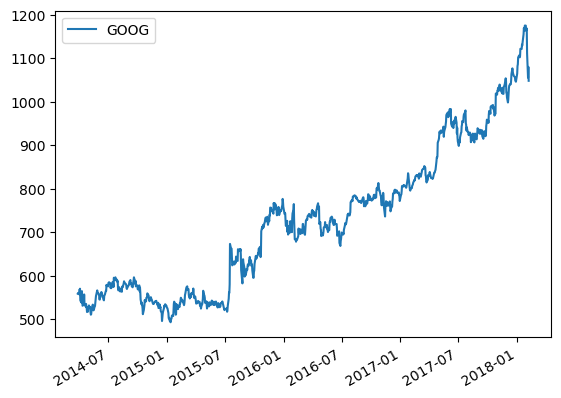

In [50]:
# copy google data
goog = close[['GOOG']].copy().dropna()
#goog.head()
goog.plot()

<Axes: >

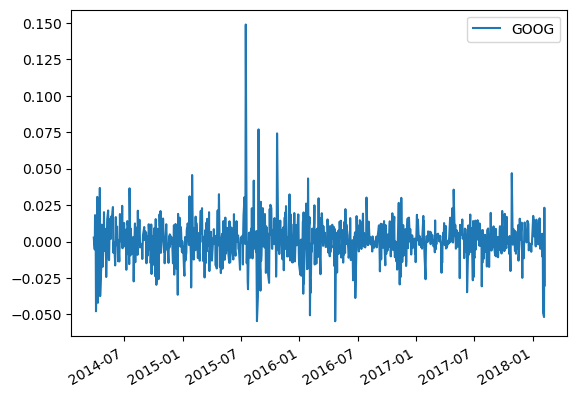

In [51]:

goog_ret = np.log(goog.pct_change(1) + 1) #pct_change: returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.
goog_ret.plot()

In [52]:

goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


<Axes: >

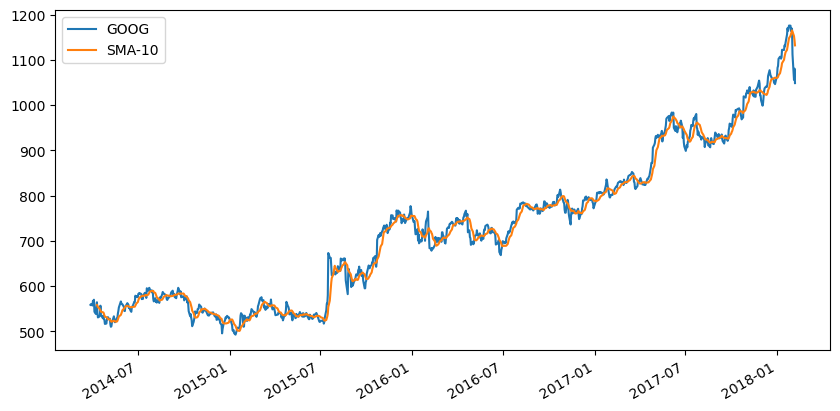

In [53]:
goog.plot(figsize=(10, 5))

<Axes: >

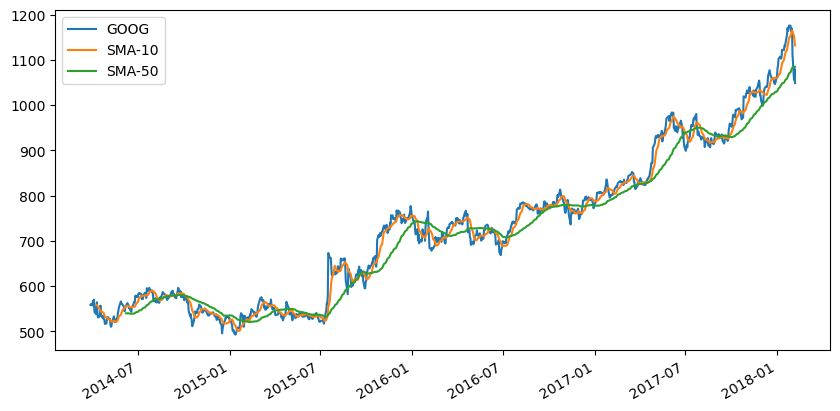

In [54]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10, 5))

In [55]:
#Serie temporal multidimensional
goog_aapl = close[['GOOG', 'AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [56]:
#Seleccionar una fecha y convertirl los datos  a un arreglo de
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [57]:
#Log return
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [58]:
#mas suave
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

<Axes: >

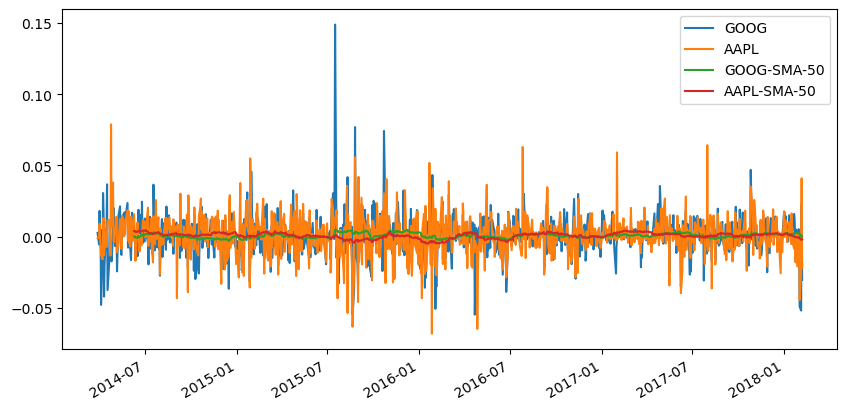

In [59]:
goog_aapl_ret.plot(figsize=(10, 5))

In [60]:
cov = goog_aapl_ret[['GOOG', 'AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [61]:
corr = goog_aapl_ret[['GOOG', 'AAPL']].rolling(50).corr()
corr.tail(16) #last 16

GOOG      AAPL
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000

# Estacionalidad

In [62]:
from statsmodels.tsa.stattools import adfuller

stocks = pd.read_csv('../datasets/sp500sub.csv', index_col='Date', parse_dates=True)
stocks.head()


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [63]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05: #5%
    print("Stationary")
  else:
    print("Non-Stationary")

Test-Statistic: -0.41819025789061465
P-Value: 0.9070170677498406
Non-Stationary


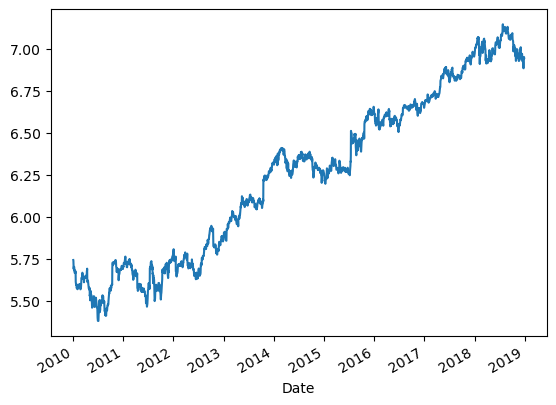

In [64]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]
goog['LogPrice'] = np.log(goog['Close'])
goog['LogPrice'].plot()
adf(goog['LogPrice'])

Test-Statistic: -46.66748022773676
P-Value: 0.0
Stationary


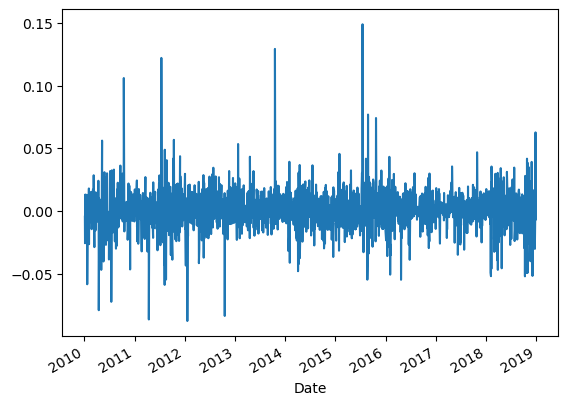

In [65]:
goog['LogRet'] = goog['LogPrice'].diff()
goog['LogRet'] = goog['LogPrice'].diff()
goog['LogRet'].plot()
adf(goog['LogRet'].dropna())


## PACF y ACF

In [110]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [112]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']].copy()

In [113]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()


In [118]:
goog['LogRet'] = log_ret(goog['Close'])
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


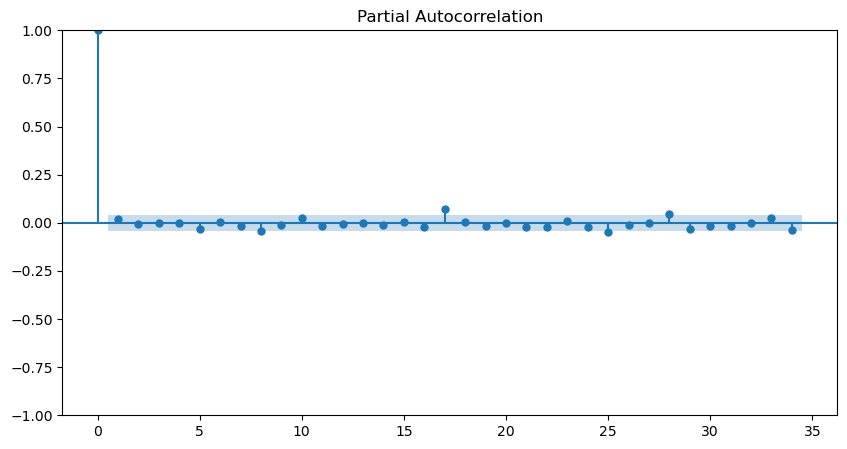

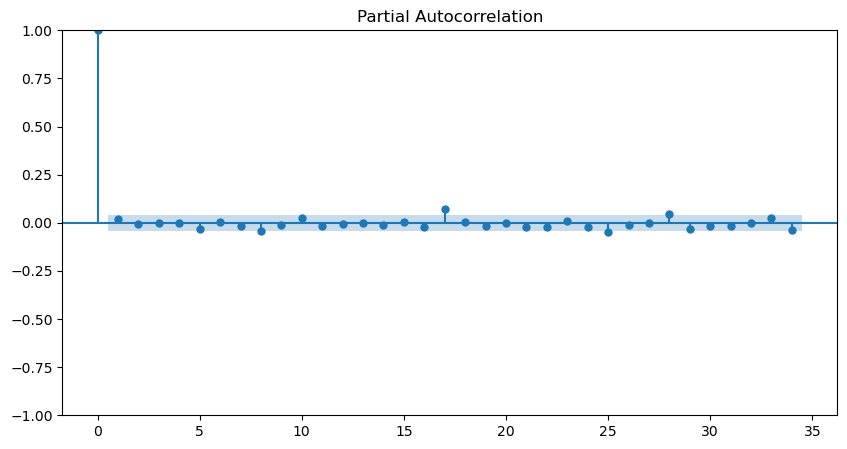

In [117]:


fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(goog['LogRet'].dropna(), ax=ax) #p=0

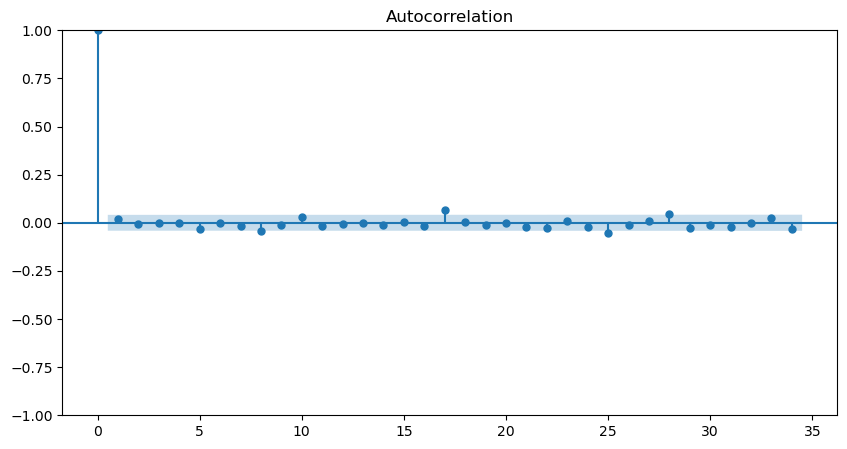

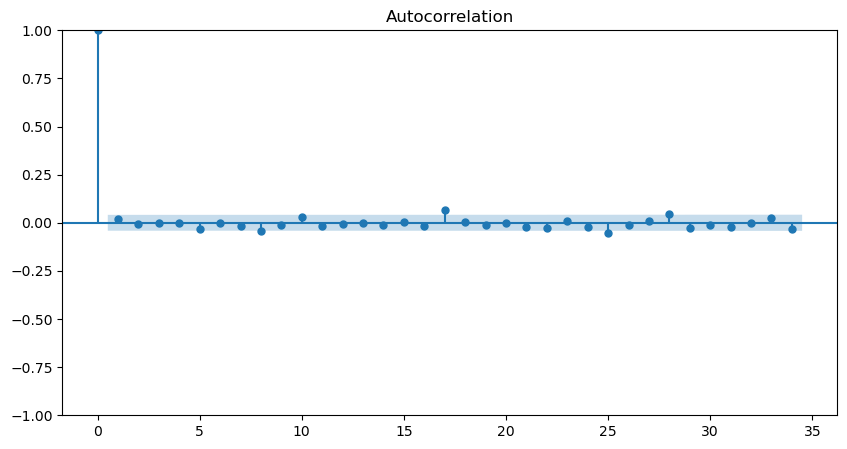

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(goog['LogRet'].dropna(), ax=ax) #q=0, (0,1,0) random

## ARIMA

In [70]:
goog = stocks[stocks['Name'] == 'GOOG']['Close']
# goog = np.log(df[df['Name'] == 'GOOG']['Close'])

<Axes: xlabel='Date'>

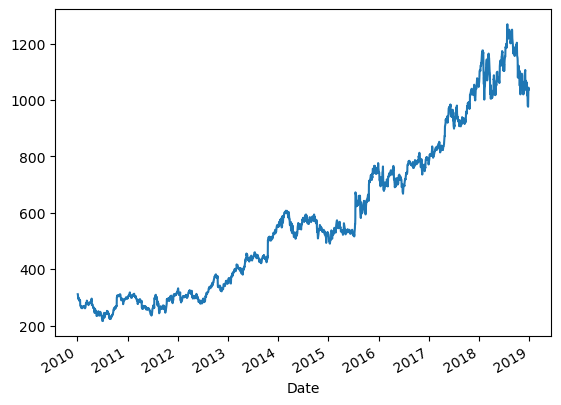

In [71]:
goog.plot()

In [72]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [73]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.32 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.62 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.12 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 3.508 seconds


In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Mon, 22 Apr 2024   AIC                          16264.983
Time:                        15:55:21   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [76]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start=d, end=-1)
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(fulldata.index, fulldata, label='data')
  ax.plot(train.index[d:], train_pred, label='fitted')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend()

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


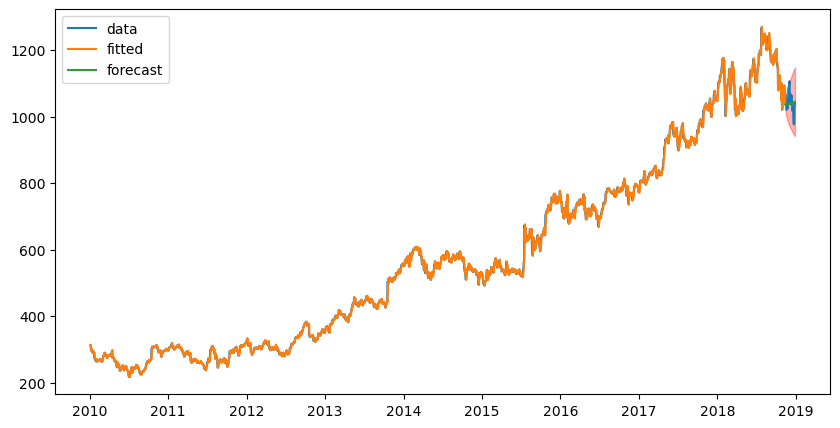

In [77]:
plot_result(model, goog, train, test)

In [82]:
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(test.index, test, label='true')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend()

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


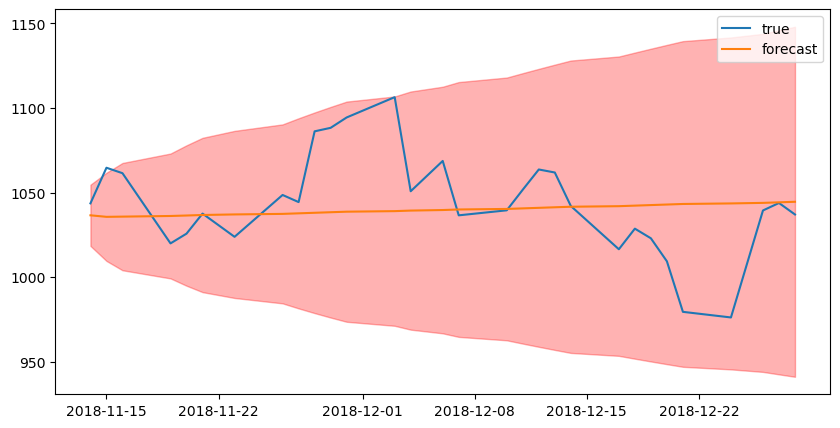

In [83]:
plot_test(model, test)

In [84]:
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [85]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: nan
RMSE Naive: 30.029502477261467


/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

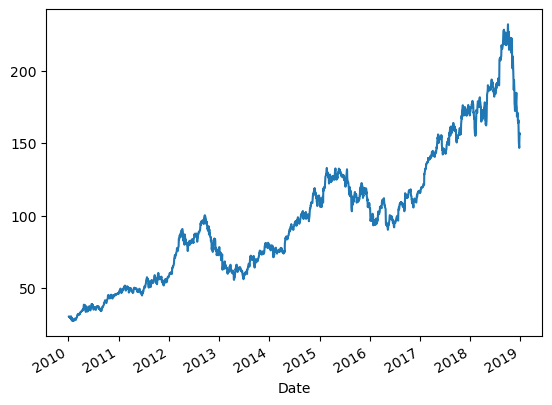

In [87]:
aapl = stocks[stocks['Name'] == 'AAPL']['Close']
# aapl = np.log(df[df['Name'] == 'AAPL']['Close'])
aapl.plot()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.18 sec

Best model:  ARIMA(2,1,2)(0,0,0)

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


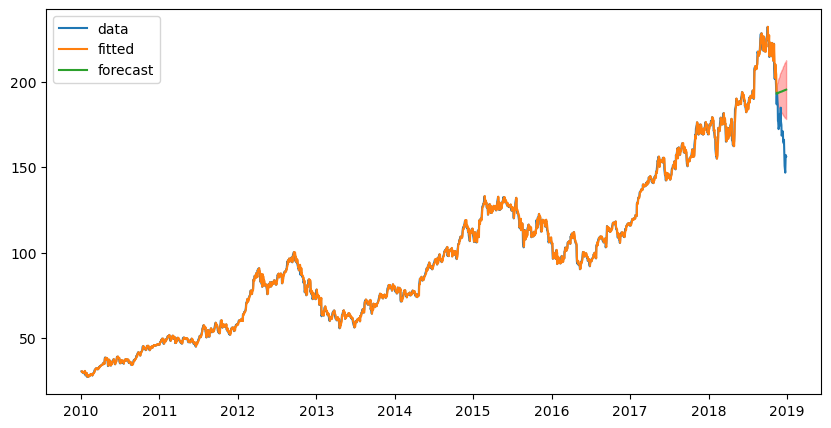

In [89]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)
print(model.summary())
plot_result(model, aapl, train, test)

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


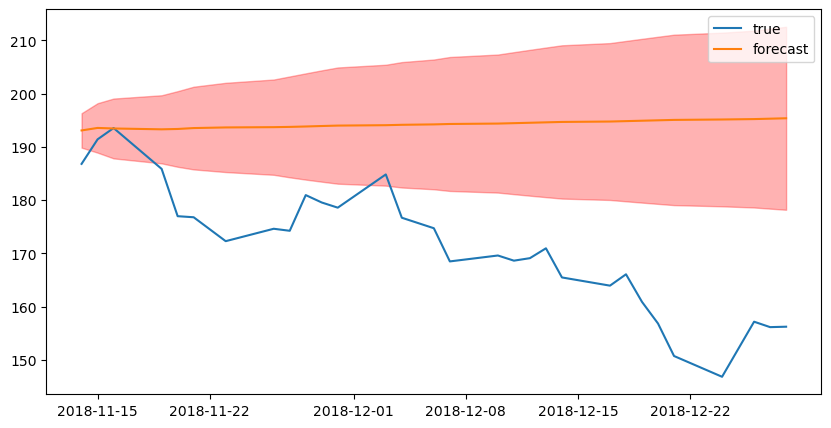

In [90]:
plot_test(model, test)

In [99]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))


RMSE ARIMA: nan
RMSE Naive: 24.02712058667382


/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
